In [102]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [122]:
# ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [123]:
#imporiting csv into a dataframe
df = pd.read_csv("als_data.csv")

In [124]:
df

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [126]:
df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


Remove any data that is not relevant to the patient’s ALS condition.

In [127]:
#removing the id column
df = df.drop('ID', axis=1)
df = df.drop('SubjectID', axis=1)
df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


Apply a standard scalar to the data.

In [128]:
#assigning standarscaler
scaler = StandardScaler()

In [129]:
#fitting scaler
df_fit = scaler.fit_transform(df)
df_fit

array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [130]:
#number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

In [131]:
#empty list
sil_score = []

In [133]:
for cluster in range_n_clusters:  
    # build k-means model
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(df_fit)
    cluster_labels = kmeans.labels_
    # append the score into the empty list
    sil_score.append(silhouette_score(df_fit, cluster_labels))

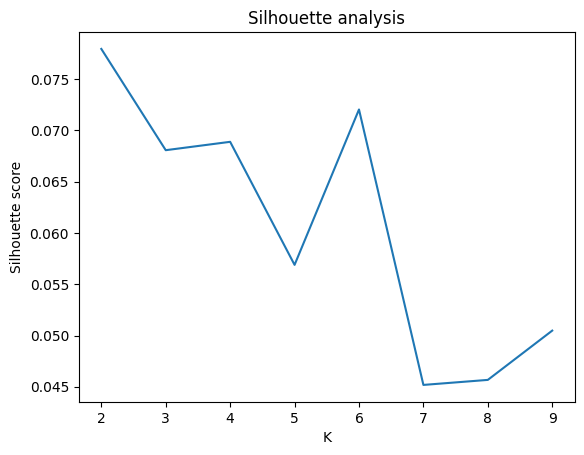

In [120]:
# plot 
plt.plot(range_n_clusters,sil_score)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis")
plt.show()

Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

the optimal number of clusters is 2 because that is when the silhoutte score is at the highest point. 

Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [134]:
# kmean model with two
kmeans_2 = KMeans(n_clusters=2) 

In [135]:
kmeans_2.fit(df_fit)
label=kmeans_2.predict(df_fit)

In [136]:
#fitting the model
kmeans_fit = kmeans_2.fit_predict(df_fit)

In [137]:
#calculating silhouette score
print(f'Silhouette Score(n=2): {silhouette_score(df_fit, label)}')

Silhouette Score(n=2): 0.07887730960924653


Fit a PCA transformation with two features to the scaled data.

In [79]:
# Apply two components 
pca_2 = PCA(n_components=2)

In [80]:
#fit pca and confirm
pca = pca_2.fit_transform(df_fit)
pca

array([[-1.41759892, -2.31612282],
       [-1.43119391, -4.86852042],
       [ 1.62657561, -0.42700158],
       ...,
       [-0.44185458,  4.2423109 ],
       [-0.33960243,  3.31505103],
       [ 1.4590966 ,  0.58059837]])

Make a scatterplot the PCA transformed data coloring each point by its cluster value.

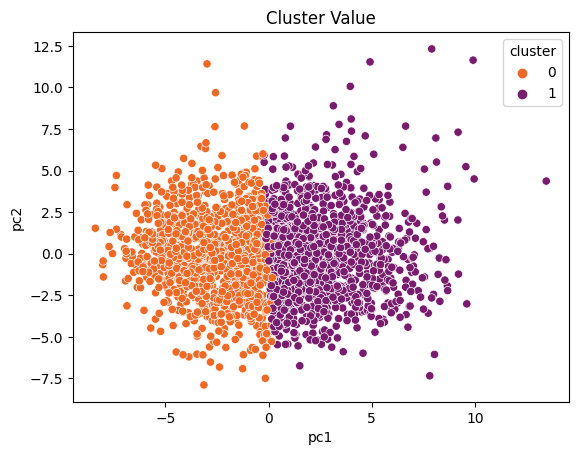

In [139]:
# Create scatterplot with cluster coloring
sns.scatterplot(data={'pc1': pca[:, 0], 'pc2': pca[:, 1], 'cluster': kmeans_fit}, x='pc1', y='pc2', hue='cluster', palette="inferno_r")
plt.title('Cluster Value')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [84]:
#kmeans fit
kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(pca)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [85]:
# predict the clusters for each point
predict_pca = kmeans_pca.predict(pca)

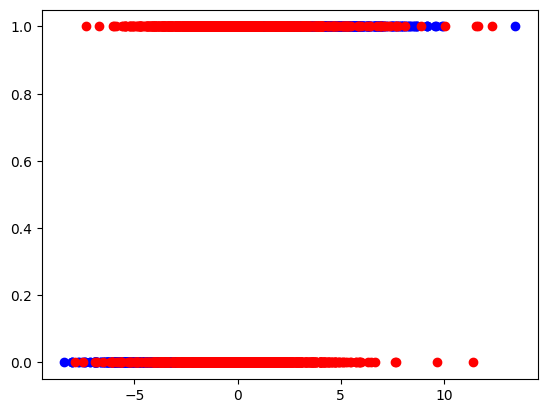

In [83]:
# plot the scatter graph
plt.scatter(pca[:, 0],predict_pca,color='b')
plt.scatter(pca[:, 1],predict_pca,color='r')

Summarize your results and make a conclusion.